# Cow tex generator

## Model

We use the reinforcement model described in this paper: https://mgmalheiros.github.io/research/leopard/ (_The leopard never changes its spots: realistic pigmentation patternformation by coupling tissue growth with reaction-diffusion, SIGGRAPH 2020_). This paper uses a reaction-diffusion model to approximate tissue growth. Our model implementation is provided in a separate python file.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Regeant C concentrations:
AVG: 1.0759141599606143
MIN: 8.32220656416191e-19
MAX: 1.9999999999999922


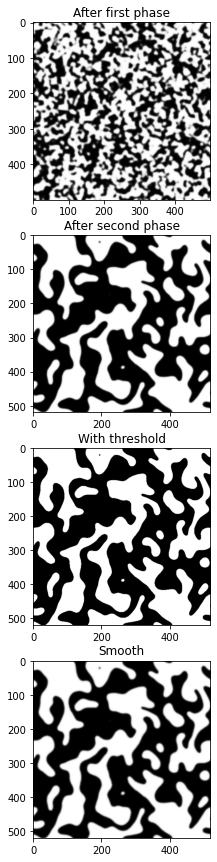

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from reinforcement import Reinforcement
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

config_cow = {
    'shape': 500,
    'scale': 5,
    'speed': 200,
    'ini_c': 0,
    'var_c': 2
}

n_cows = 10
smooth_cows = []

for cow_id in range(n_cows):
    
    cow_tex = Reinforcement(**config_cow, seed=cow_id)
    cow_tex.run_simulation(0, 100)
    pre_cow = cow_tex.getC()
    cow_tex.run_simulation(0, 1000, increasing_size=True)

    cow_c = cow_tex.getC()
    cow_threshold = cow_c > np.average(cow_c)
    cow_smooth = gaussian_filter(cow_c, sigma=1.1)
    smooth_cows.append(cow_smooth)
    
    if cow_id == 0:
        fig, ax = plt.subplots(4, figsize=(15, 15))
        cmaps = ["Greys", "Greens", "jet", "inferno", "GnBu"]
        cmap = cmaps[0]
        interpolation='bilinear'
        #interpolation='nearest'
        print("Regeant C concentrations:")
        print("AVG:", np.average(cow_c))
        print("MIN:", np.min(cow_c))
        print("MAX:", np.max(cow_c))
        ax[0].imshow(pre_cow, cmap=cmap, interpolation=interpolation)
        ax[0].set_title('After first phase')
        ax[1].imshow(cow_tex.getC(), cmap=cmap, interpolation=interpolation)
        ax[1].set_title('After second phase')
        ax[2].imshow(cow_threshold, cmap=cmap, interpolation=interpolation)
        ax[2].set_title('With threshold')
        ax[3].imshow(cow_smooth, cmap=cmap, interpolation=interpolation)
        ax[3].set_title('Smooth')
        plt.show()

## Visualization

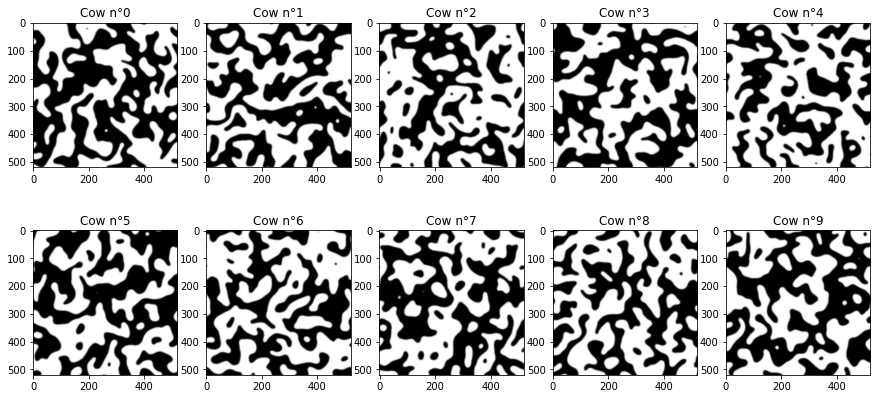

In [16]:
fig, ax  = plt.subplots(n_cows//5, 5, figsize=(15, 7))
for i in range(n_cows):
    ax[i//5, i%5].imshow(smooth_cows[i], cmap=cmap, interpolation=interpolation)
    ax[i//5, i%5].set_title('Cow n°'+str(i))
plt.show()

## Saving

In [17]:
from PIL import Image

for i in range(n_cows):
    cow_smooth_im = smooth_cows[i] * 255 / np.max(smooth_cows[i])
    image = Image.fromarray(cow_smooth_im)
    image.convert("RGB").save("../data/cow"+str(i)+".png")

# Saving to greyscale would be better, but we'll use this png in libigl 
# which doesn't have a greyscale png reader
#img0.convert("L").save("cow.png") 